# Exploratory Data Analysis 
Exploring the following data files: ```imdb.title.basics.csv.gz```, ```rt.movie_info.csv.gz```, ```tn.movie_budgets.csv.gz```,  ```imdb.title.ratings.csv.gz``` and ```bom.movie_gross.csv.gz```

> Indented block



## Importing libraries


In [305]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


##Loading Data from CSV files into pandas dataframe



In [306]:
def load_data(path):
  df = pd.read_csv(path)
  return df

In [307]:
name_basics = load_data('/content/drive/MyDrive/PROJECT1/DATA/imdb.title.basics.csv.gz')
display(name_basics.head())
print(name_basics.info())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [308]:
sum(name_basics.duplicated())

0

In [309]:
name_basics.genres.isna().value_counts()

False    140736
True       5408
Name: genres, dtype: int64

In [310]:
#dropping start year and runtime columns from the movie_ basics dataframe
dropped_cols= name_basics.drop(columns=['start_year', 'runtime_minutes', 'original_title'])
dropped_cols.head()



,tconst,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [311]:
# split the genres into lists then explode the dataframe in order to identify unique genres of movies

dropped_cols['genres']=dropped_cols.genres.str.split(",")

In [312]:
dropped_cols = dropped_cols.apply(pd.Series.explode)
dropped_cols.tail(10)

,tconst,primary_title,genres
146137,tt9916190,Safeguard,Drama
146137,tt9916190,Safeguard,Thriller
146138,tt9916428,The Secret of China,Adventure
146138,tt9916428,The Secret of China,History
146138,tt9916428,The Secret of China,War
146139,tt9916538,Kuambil Lagi Hatiku,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,tt9916706,Dankyavar Danka,Comedy
146142,tt9916730,6 Gunn,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Documentary


In [313]:
#drop rows with null entries
dropped_cols.dropna(inplace=True)
dropped_cols.isna().sum()

tconst           0
primary_title    0
genres           0
dtype: int64

In [314]:
dropped_cols.tconst.nunique()

140736

In [444]:
#Now, let's identify unique genres
#identify genres produced
genres_produced= dropped_cols.genres.value_counts()
genres_produced.head(10)

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Name: genres, dtype: int64

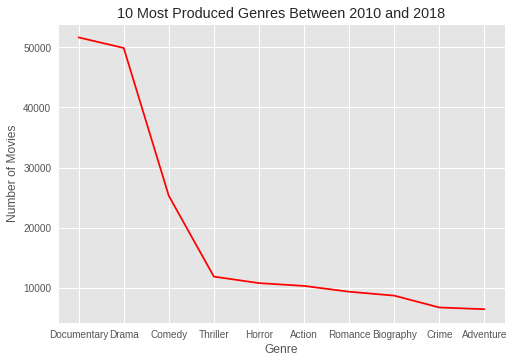

In [432]:
from matplotlib import rcParams
plt.style.use('ggplot')
plt.plot(genres_produced.head(10), color="red")
rcParams['figure.figsize']=10,5
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('10 Most Produced Genres Between 2010 and 2018')
plt.grid(True);

The above output shows top ten genres produced, including Documentaries, Drama, Comedy, Thriller, Horror, Action, Romance, Biography, Crime, Adventure.

In [317]:
movie_budget = load_data('/content/drive/MyDrive/PROJECT1/DATA/tn.movie_budgets.csv.gz')
display(movie_budget.head())
print(movie_budget.info())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


In [318]:
# clean the production_budget, domestic_gross and worldwide_gross by removing commas(,)
# and dollar signs
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(",", "").str.replace("$", "").astype(int)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace(",", "").str.replace("$", "").astype(int)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(",", "").str.replace("$", "").astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [319]:
# drop rows with zero values 
movie_budget_nonzero= movie_budget[~(movie_budget[movie_budget.columns[3:]]==0).any(axis=1)]
movie_budget_nonzero.tail(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5769,70,"Apr 1, 1996",Bang,10000,527,527
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000,401,401
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928
5774,75,"Oct 8, 2004",Primer,7000,424760,841926
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041


In [320]:
# format release_date column from integer to date-time-type data type.
from datetime import datetime
movie_budget_nonzero['release_date'].dtype

movie_budget_nonzero['release_date'] = pd.to_datetime(movie_budget_nonzero['release_date'])

movie_budget_nonzero['total_gross']=(movie_budget_nonzero.worldwide_gross + movie_budget_nonzero.worldwide_gross)
movie_budget_nonzero['movie_profit']=(movie_budget_nonzero.total_gross - movie_budget_nonzero.production_budget)

movie_budget_nonzero.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,movie_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5552690558,5127690558
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2091327750,1680727750
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,299524700,-50475300
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2806027926,2475427926
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2633443494,2316443494


In [321]:
# add a column 'month' to identify which months movies are likely to perform well
movie_budget_nonzero['month']= movie_budget_nonzero.release_date.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [322]:

movies_profit=movie_budget_nonzero.sort_values(by='movie_profit', ascending=False)
movies_profit.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,movie_profit,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5552690558,5127690558,12
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,4416416790,4216416790,12
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,4106622440,3800622440,12
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,4096268400,3796268400,4
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,3297709728,3082709728,6
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,3037445588,2847445588,4
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,3035871794,2810871794,5
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2683386314,2558386314,7
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2696516448,2496516448,2
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2806027926,2475427926,5


In [323]:
#ten movies with the lease return of investment

least_profit=movie_budget_nonzero.sort_values(by='movie_profit', ascending=False).tail(10)
least_profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,movie_profit,month
1047,48,2002-09-20,Eye See You,55000000,79161,1807990,3615980,-51384020,9
1046,47,1998-07-22,Lolita,55000000,1147784,1147784,2295568,-52704432,7
435,36,1995-12-22,Cutthroat Island,92000000,10017322,18517322,37034644,-54965356,12
669,70,2001-02-23,Monkeybone,75000000,5409517,5409517,10819034,-64180966,2
607,8,2005-09-02,A Sound of Thunder,80000000,1900451,6300451,12600902,-67399098,9
477,78,2017-04-21,The Promise,90000000,8224288,10551417,21102834,-68897166,4
193,94,2011-03-11,Mars Needs Moms,150000000,21392758,39549758,79099516,-70900484,3
352,53,2001-04-27,Town & Country,105000000,6712451,10364769,20729538,-84270462,4
404,5,2002-08-16,The Adventures of Pluto Nash,100000000,4411102,7094995,14189990,-85810010,8
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,6200000,-103800000,6


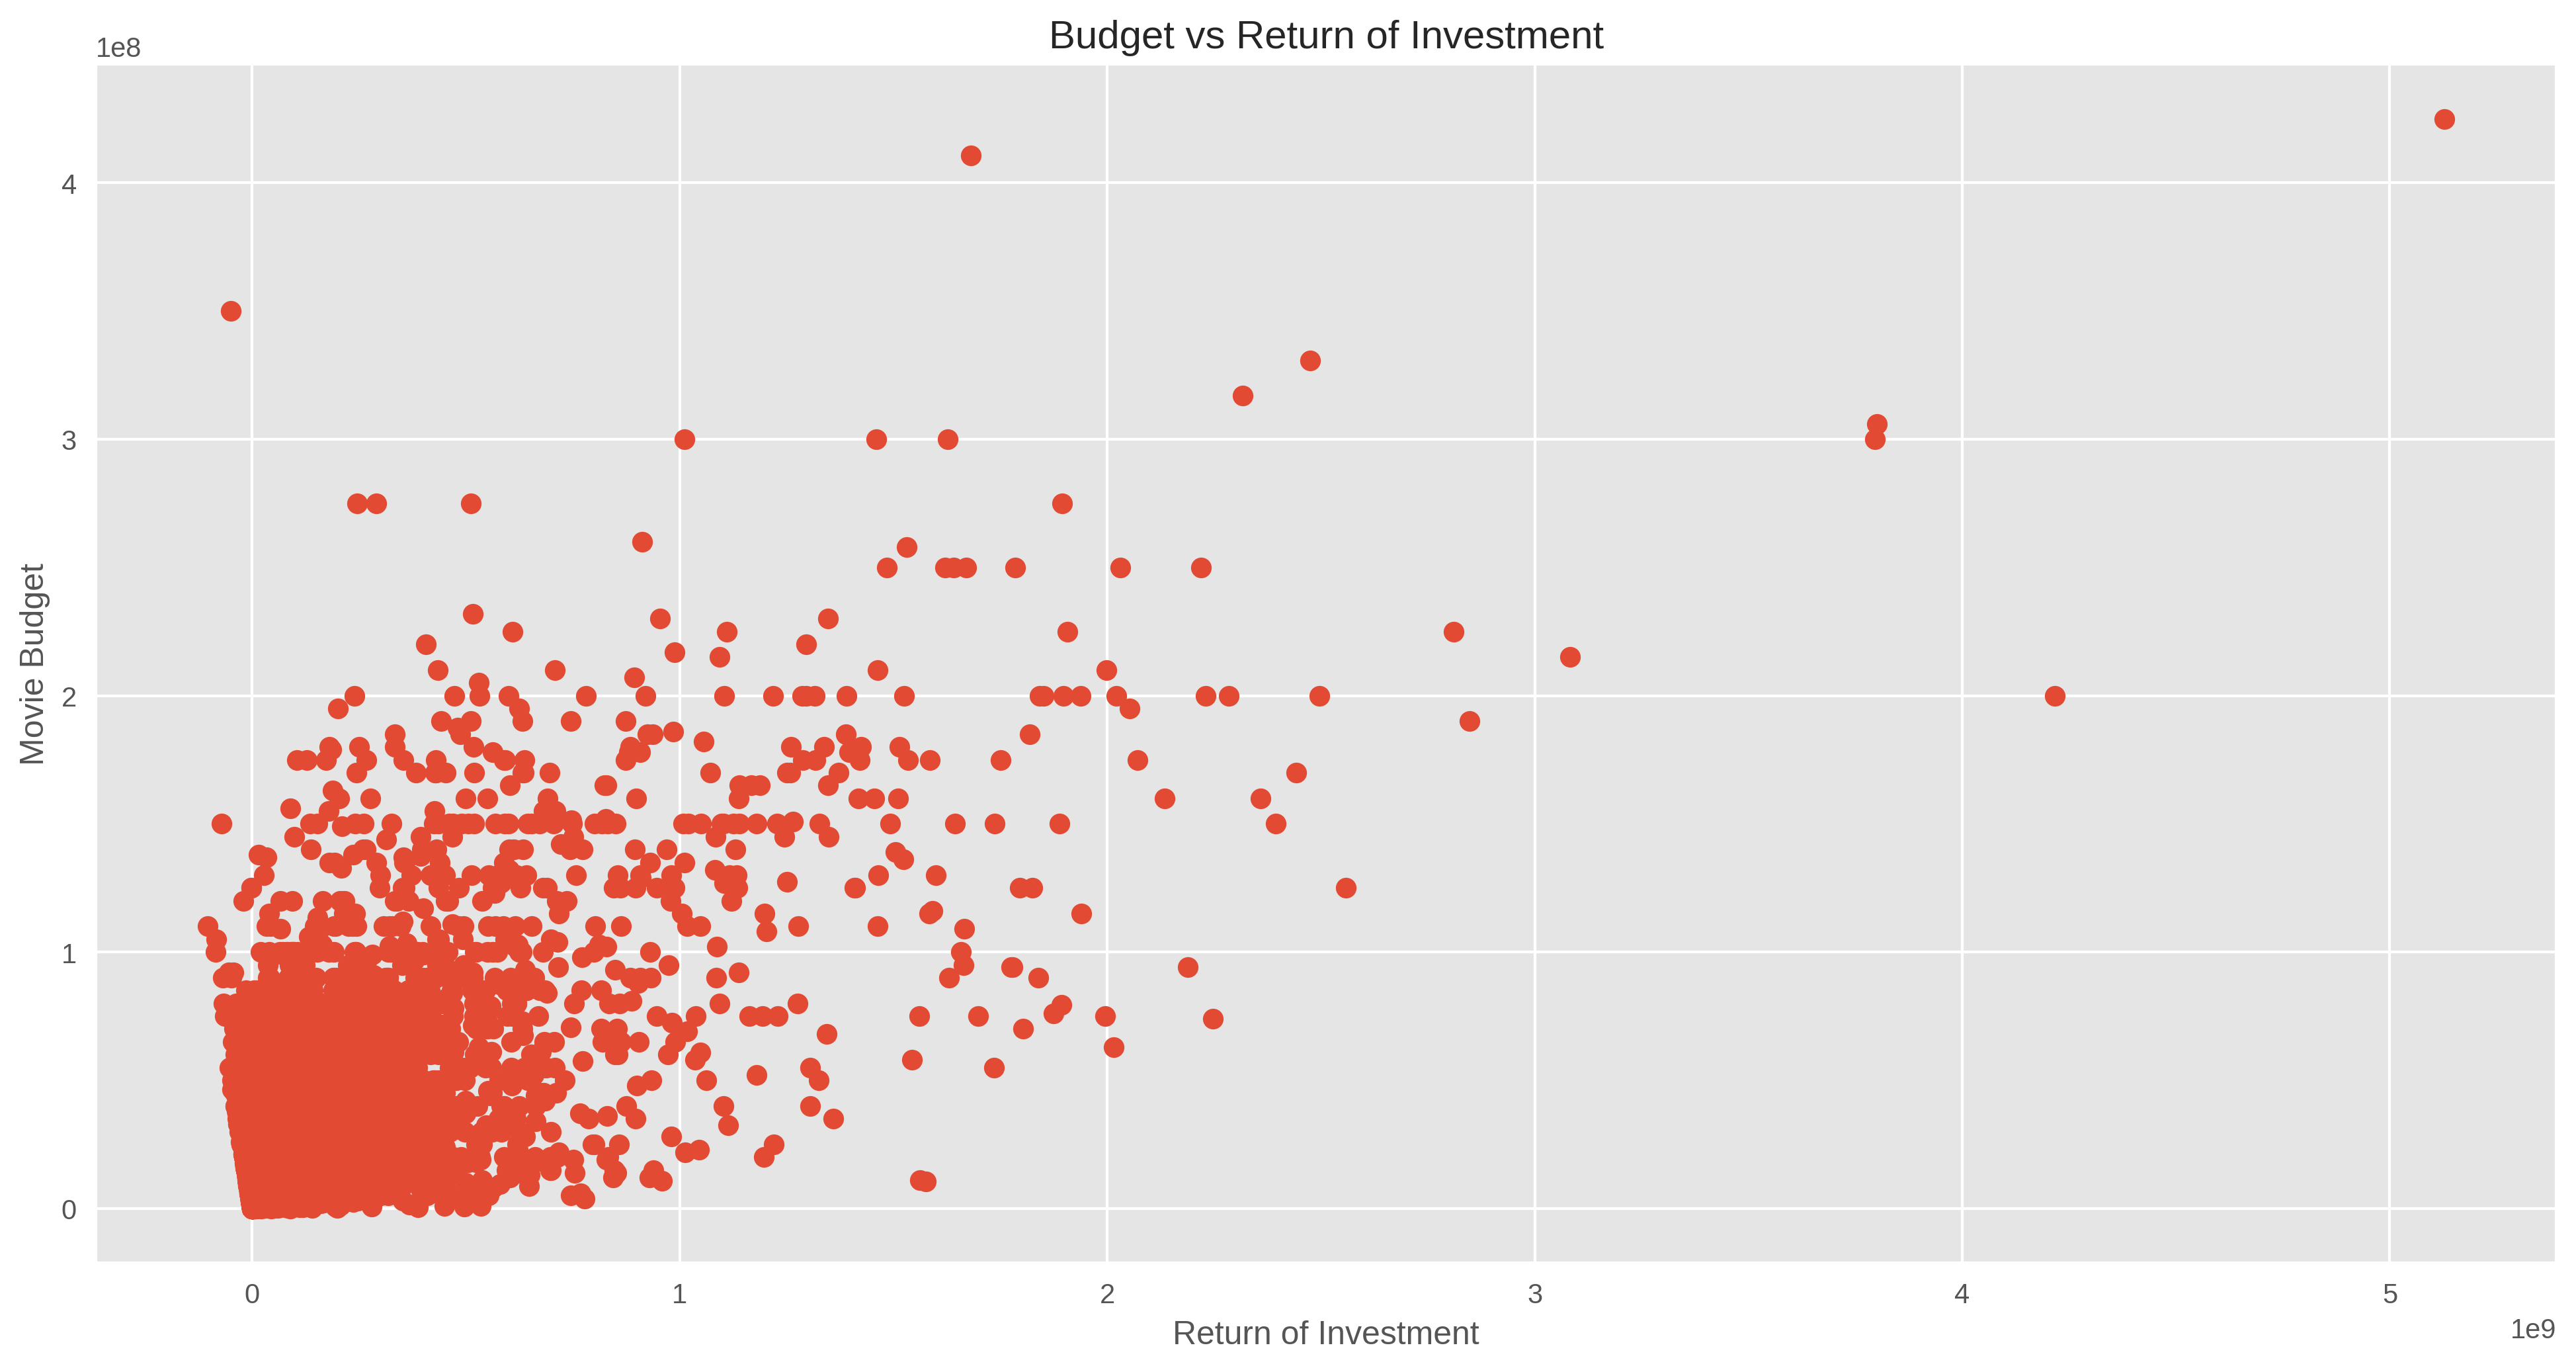

In [324]:
# how does budget affect the total income generated by movies
# let's demonstrate this using a scatter plot
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x=movies_profit['movie_profit']
y= movies_profit['production_budget']
plt.scatter(x,y)
ax.set_title('Budget vs Return of Investment')
ax.set_ylabel('Movie Budget')
ax.set_xlabel('Return of Investment')
plt.show()

In [325]:
budg_ROI_corr= movies_profit.production_budget.corr(movies_profit['movie_profit'])
budg_ROI_corr

0.6843924059882792

In [326]:
#Movie production budget and return of investment of the movies have a positive correlation
#of 0.6843
#which might imply that the higher the movie budget, the more
#the expected return of investment of movies.

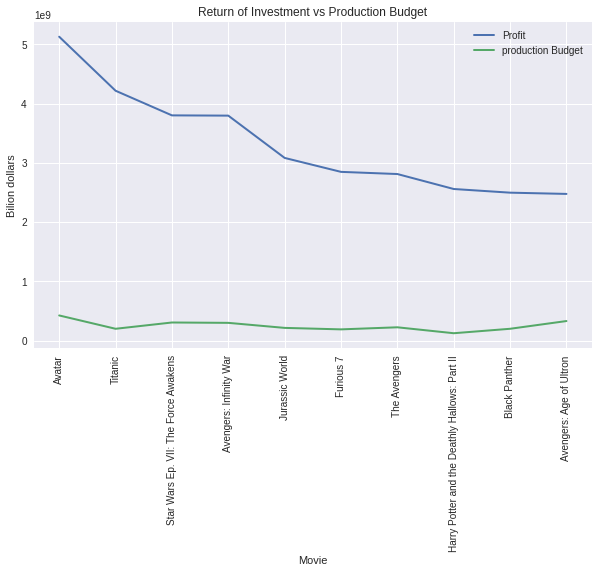

In [441]:
plt.style.use('seaborn')
fig, ax=plt.subplots(figsize=(10,6))
prof=(movies_profit['movie_profit'][:10].values)
budg=(movies_profit['production_budget'][:10].values)
x=(movies_profit['movie'][:10].values)
ax.plot(x,prof, linewidth=2)
ax.plot(x,budg, linewidth=2)
ax.set_xlabel('Movie')
ax.set_ylabel('Bilion dollars')
ax.set_title('Return of Investment vs Production Budget')
plt.legend(['Profit', 'production Budget'])
plt.xticks(rotation=90)
ax.grid(True);

The higher the budget the more the return of investment

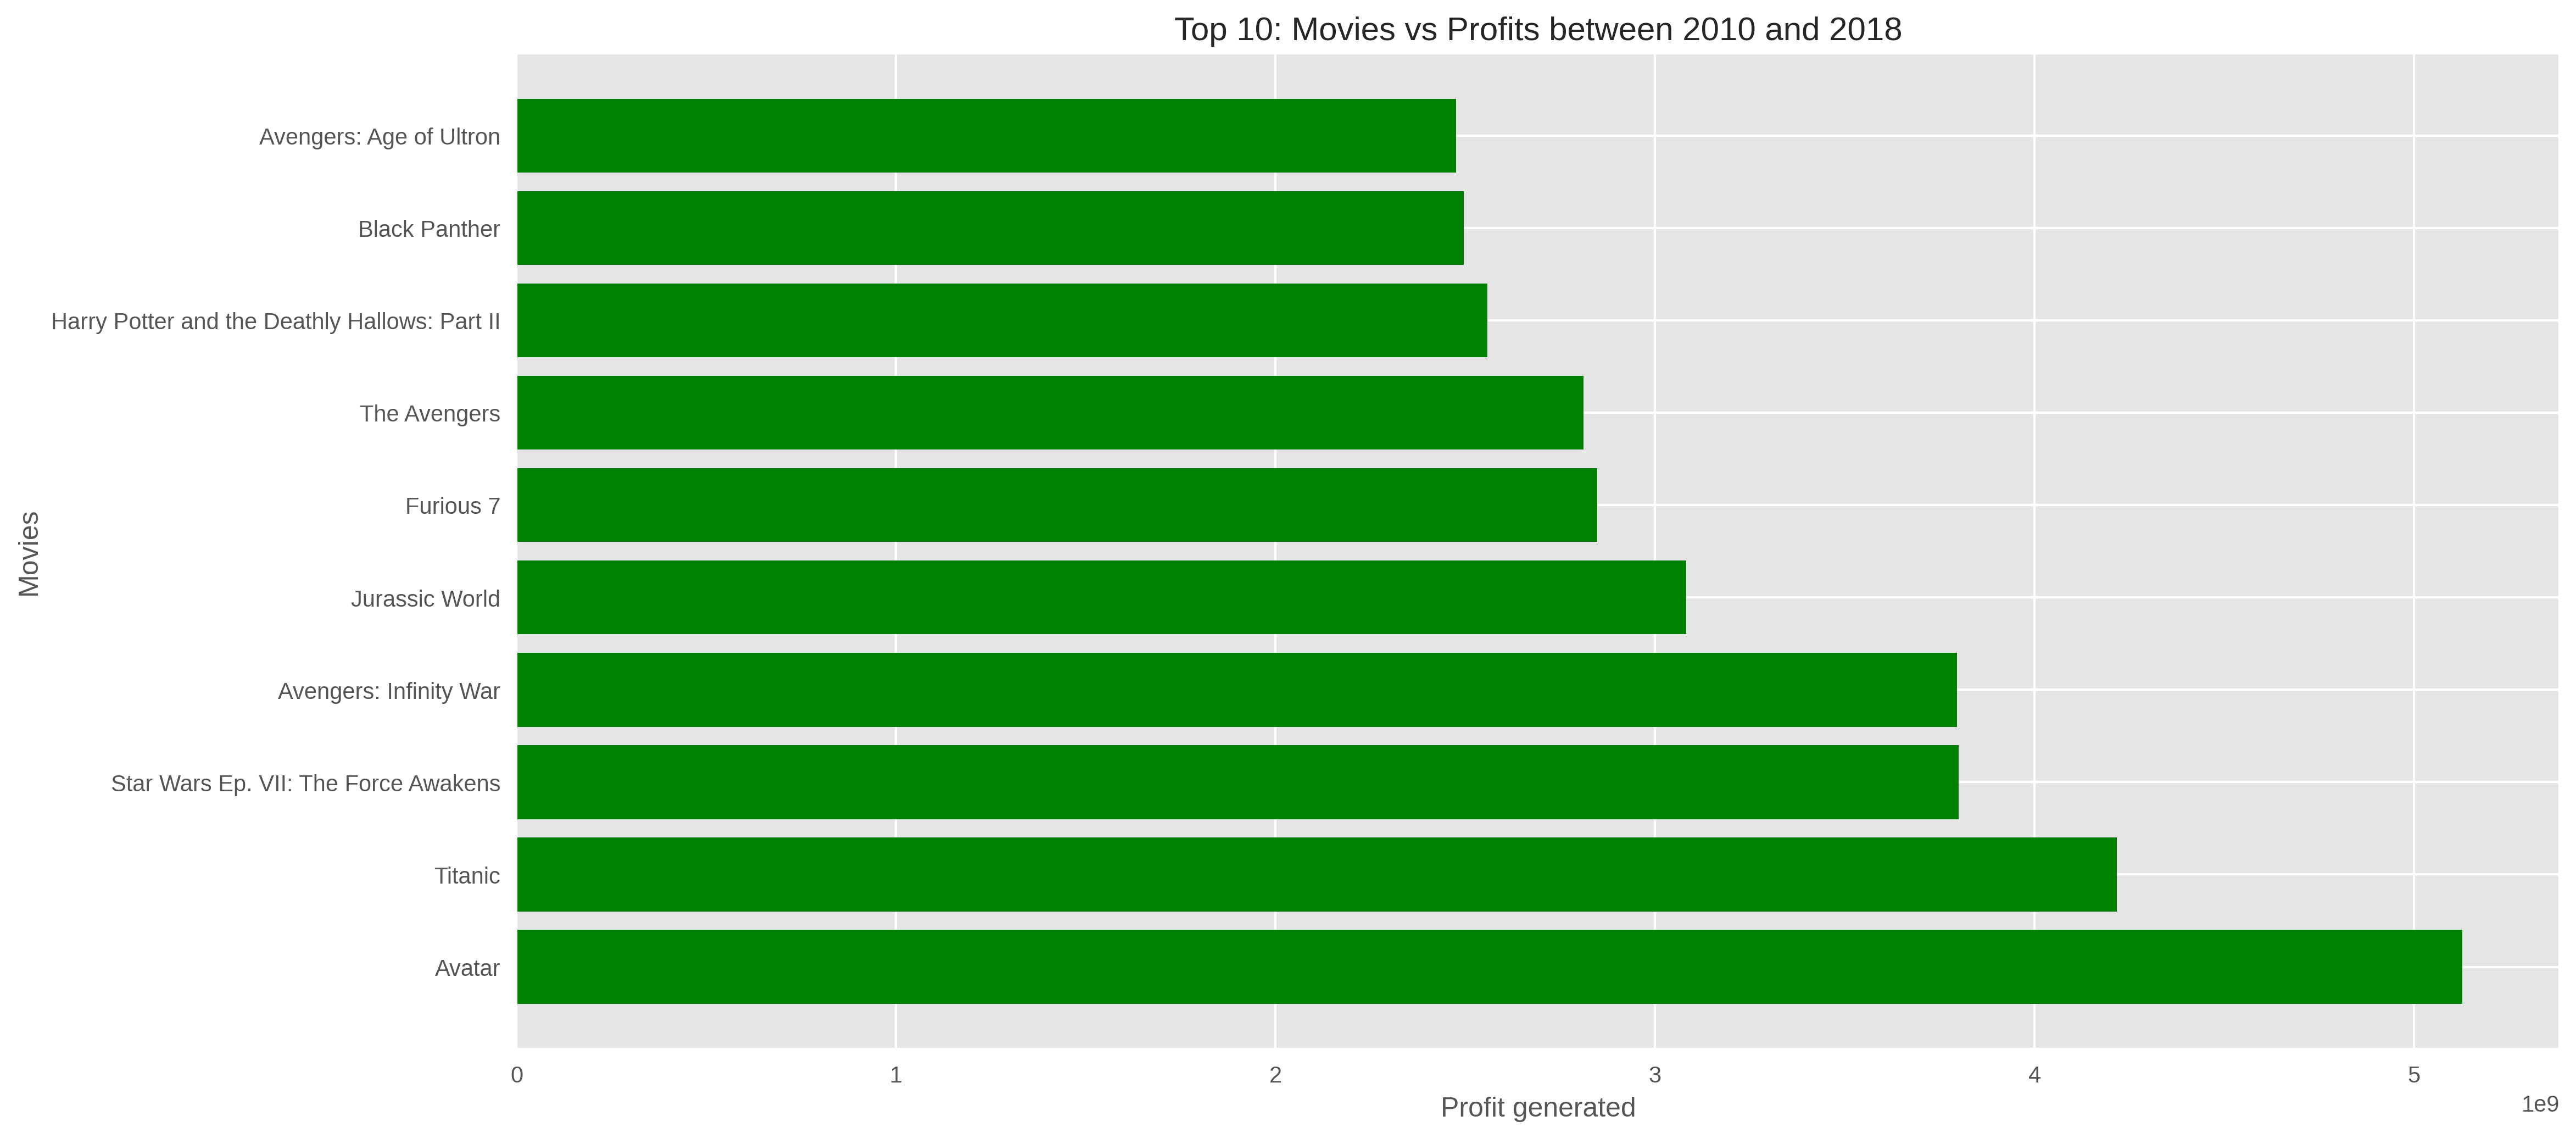

In [327]:
#most profitable movies
fig, ax=plt.subplots(figsize=(16,8), dpi=300)
x=movies_profit['movie'][:10]
y=movies_profit['movie_profit'][:10]
ax.barh(x,y, color='green')
ax.set_ylabel('Movies')
ax.set_xlabel('Profit generated')
ax.set_title('Top 10: Movies vs Profits between 2010 and 2018')
plt.show()

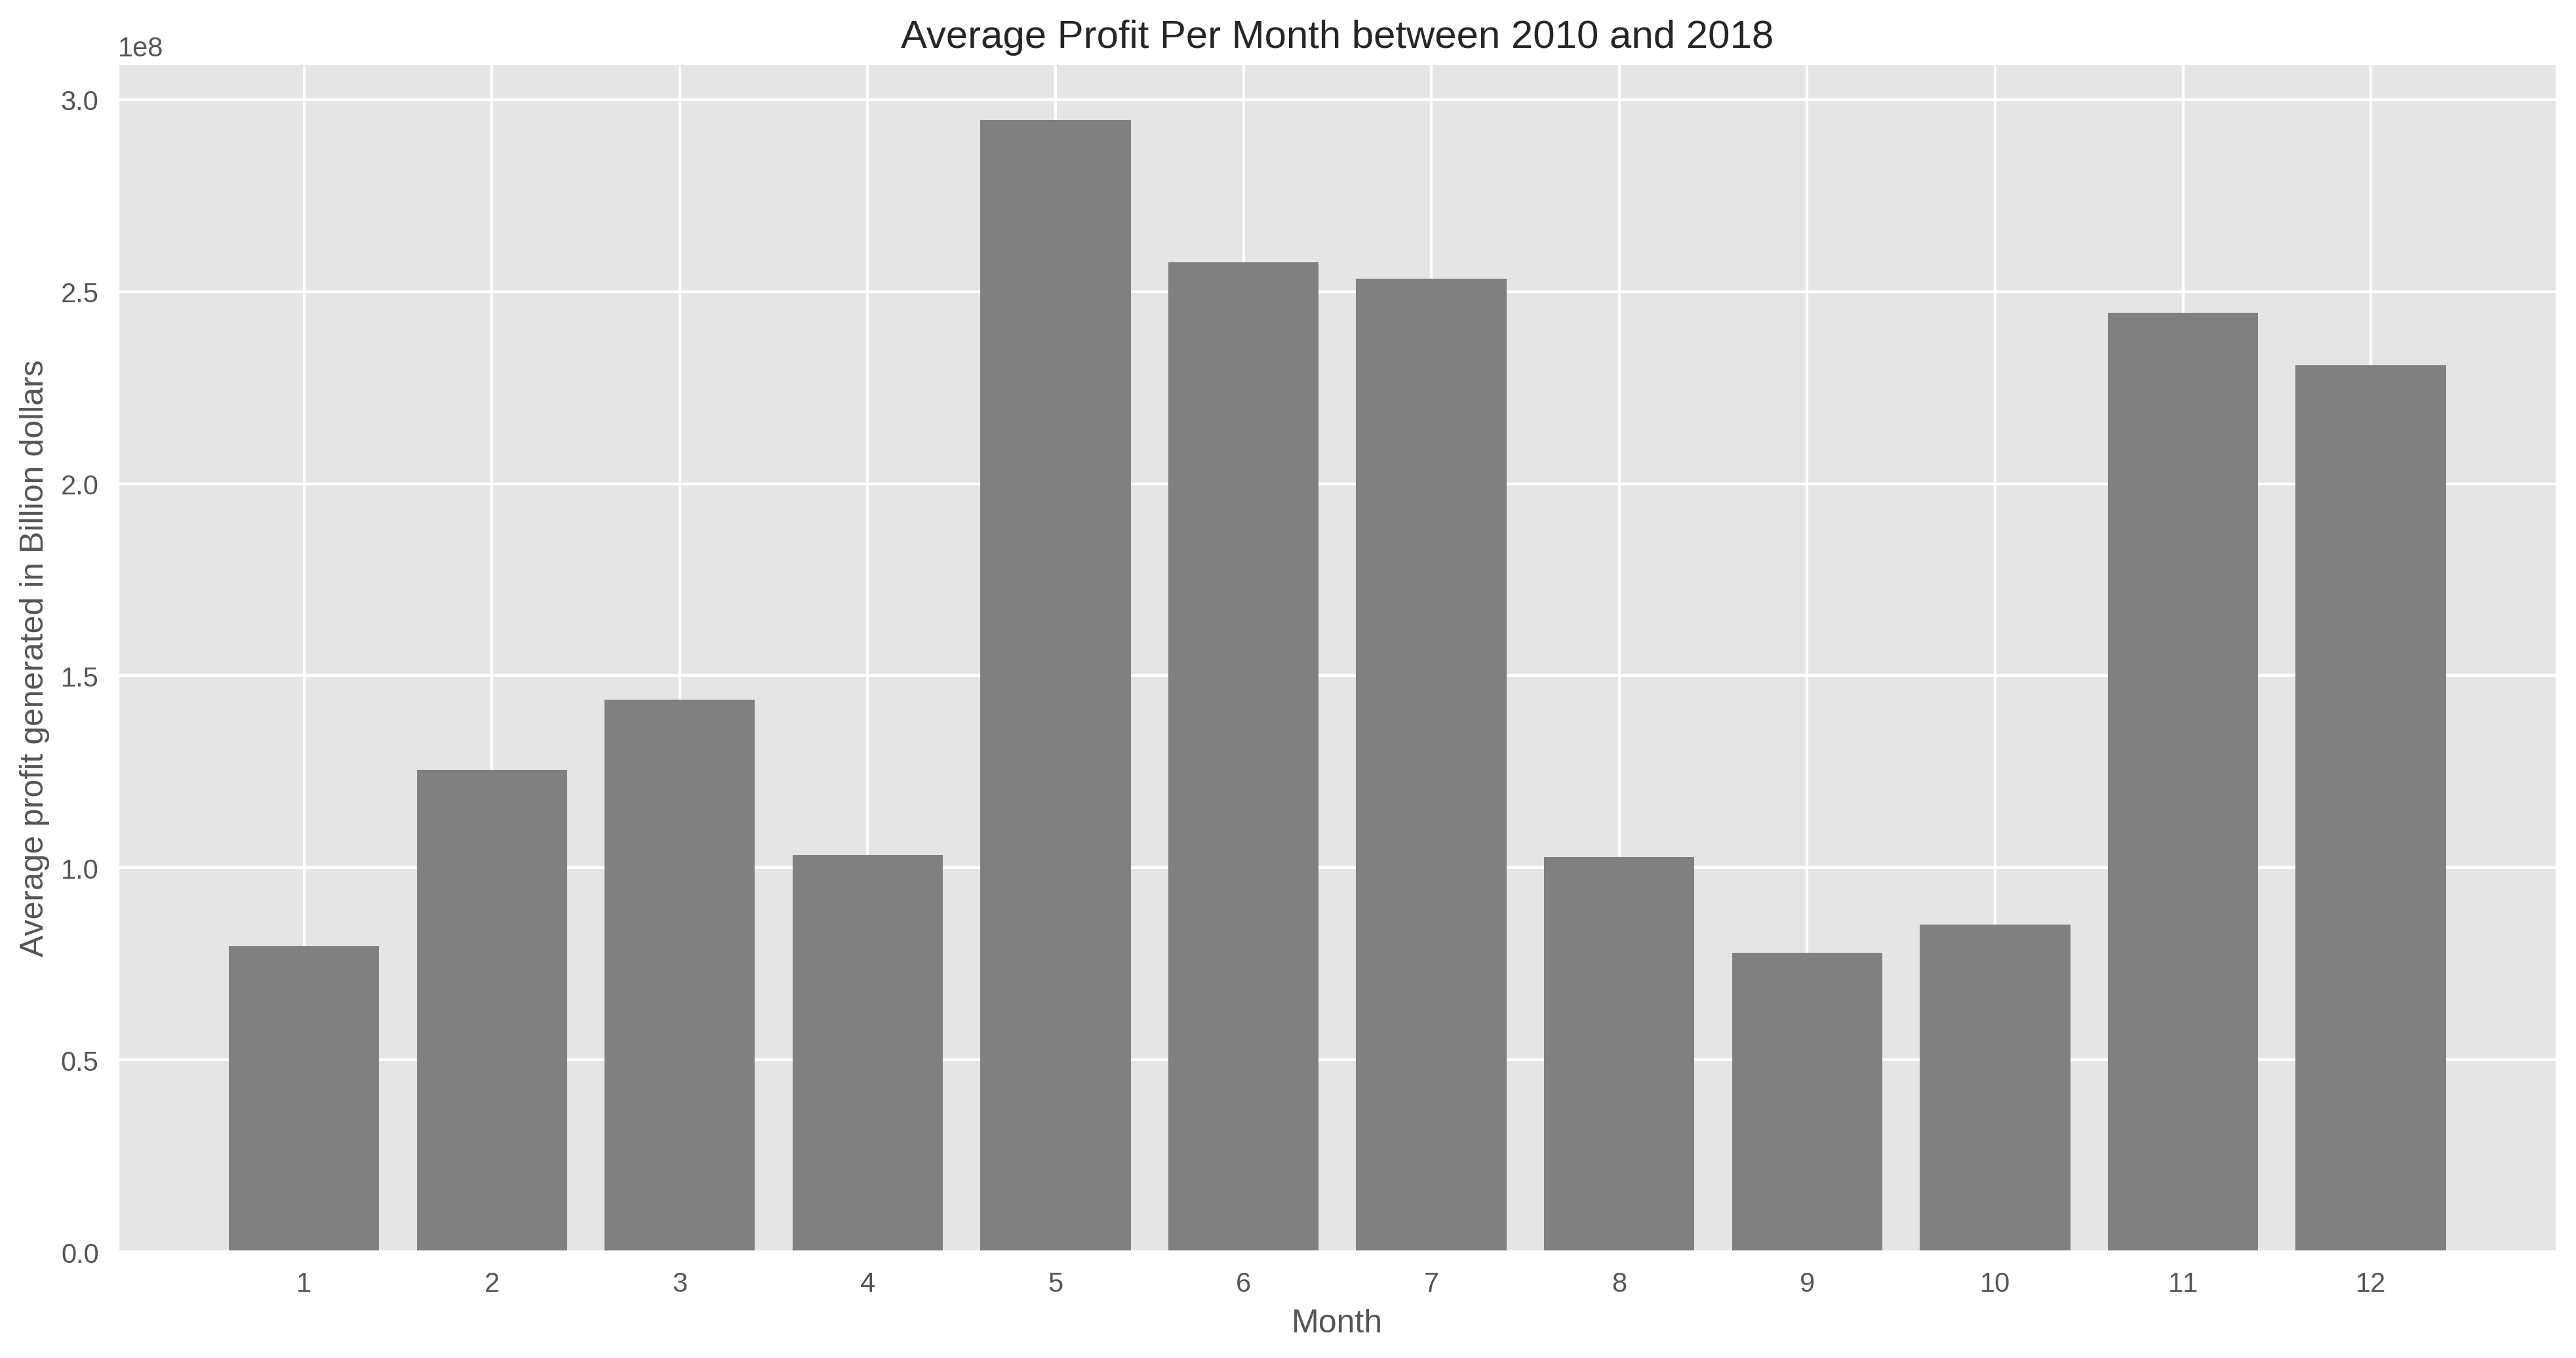

In [328]:
# Let's identify the best months to produce movies based on the total profit
#the movies generated in those months over the years
fig, ax=plt.subplots(figsize=(16,8), dpi=300)
months=movies_profit.groupby('month', as_index=False).agg({'movie_profit': np.mean})
x=months['month']
y=months['movie_profit']
ax.bar(x,y, color='gray')
ax.set_xticks(range(1, 13, 1))
ax.set_ylabel('Average profit generated in Billion dollars')
ax.set_xlabel('Month')
ax.set_title('Average Profit Per Month between 2010 and 2018')
plt.show()


From the bar graph above, It is implied that the best months to release a movie include May, June, July, November and December This may be due to November and December being holiday months and May, June and July being summer months, hence many people are free to watch new releases.

In [329]:
movie_ratings = load_data('/content/drive/MyDrive/PROJECT1/DATA/imdb.title.ratings.csv.gz')
display(movie_ratings.head())
print(movie_ratings.info())

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [330]:
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [331]:
#correlation between number of votes and average rating
movie_ratings['averagerating'].corr(movie_ratings['numvotes'])


0.04447809440198376

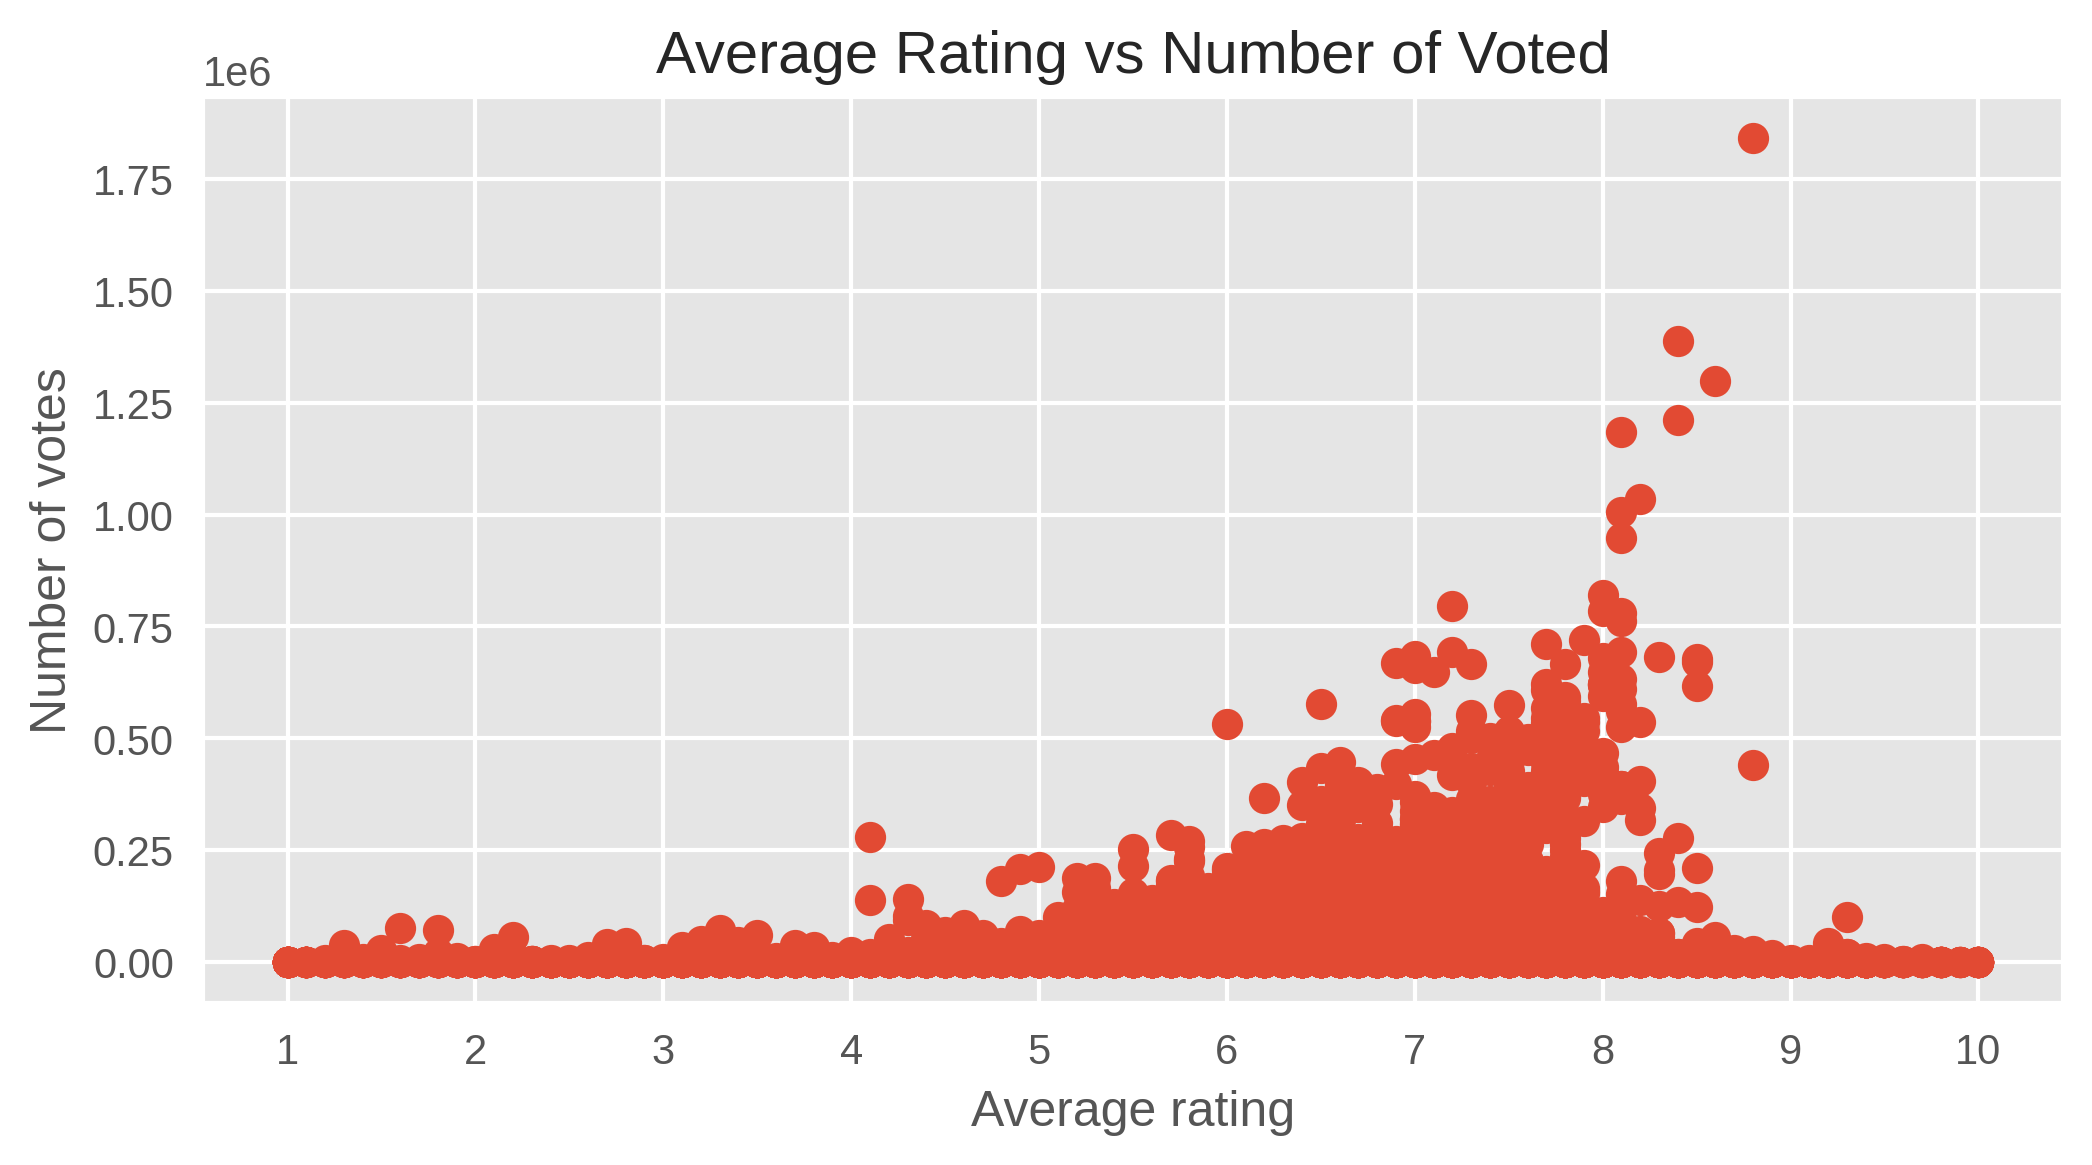

In [332]:
#using a scatter plot how number of votes and average rating are correlated
fig, ax = plt.subplots(figsize=(8,4), dpi=300)
x=movie_ratings['averagerating']
y= movie_ratings['numvotes']
plt.scatter(x,y)
ax.set_title('Average Rating vs Number of Voted')
ax.set_ylabel('Number of votes')
ax.set_xlabel('Average rating')
ax.set_xticks(range(1, 11, 1))
plt.show()

In [333]:
print('Most number of votes:',  movie_ratings.numvotes.max())
print('Least number of votes:', movie_ratings.numvotes.min())


Most number of votes: 1841066
Least number of votes: 5


In [334]:
print('Highest rating:', movie_ratings.averagerating.max())
print('Least rating:', movie_ratings.averagerating.min())

Highest rating: 10.0
Least rating: 1.0


In [341]:
movie_ratings[movie_ratings['averagerating']==10]

,tconst,averagerating,numvotes
6784,tt5390098,10.0,5
7017,tt6295832,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
27644,tt8730716,10.0,5
34334,tt4960818,10.0,8
45335,tt6991826,10.0,5
45660,tt10176328,10.0,5
47796,tt4944240,10.0,5
49073,tt5089804,10.0,7


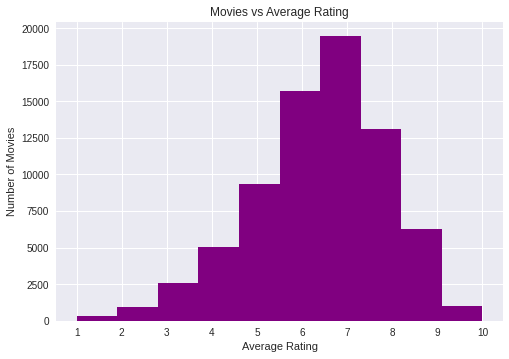

In [344]:
plt.hist(movie_ratings.averagerating, color='purple')
plt.style.use('seaborn')
plt.title('Movies vs Average Rating')
plt.ylabel('Number of Movies')
plt.xlabel('Average Rating')
plt.xticks(range(1,11,1))
plt.show()

Best rated movie scored a 10 while the least rated movie scored a 1. 
The mean average rating is 6.3.
The histogram has a left skew.

In [345]:
#merge the crew dataframe and movie ratings
#to identify best rated movies

In [346]:
gross_income = load_data('/content/drive/MyDrive/PROJECT1/DATA/bom.movie_gross.csv.gz')
display(gross_income.tail())
print(gross_income.info())

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [347]:
# drop null values, remove commas and & from float values
gross_income.dropna(axis=0, inplace=True)
gross_income['foreign_gross'] = gross_income['foreign_gross'].str.replace(",", "").str.replace("$", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [348]:
#create a new column to find gross income movies generated(sum of foreign and domestic gross)
#between 2010 and 2018
gross_income.insert(4, 'income_generated', (gross_income.domestic_gross.astype(int)+gross_income.foreign_gross.astype(int)))

In [349]:
gross_income

,title,studio,domestic_gross,foreign_gross,income_generated,year
0,Toy Story 3,BV,415000000.0,652000000.0,1067000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1025500000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,960300000,2010
3,Inception,WB,292600000.0,535700000.0,828300000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,752600000,2010
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,1501400,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,954000,2018
3309,Time Freak,Grindstone,10000.0,256000.0,266000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,98400,2018


In [350]:
gross_income.describe()

,domestic_gross,foreign_gross,income_generated,year
count,2.007000e+03,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,1.228102e+08,2013.506228
std,8.162689e+07,1.381796e+08,2.075562e+08,2.597997
min,4.000000e+02,6.000000e+02,4.900000e+03,2010.000000
25%,6.700000e+05,3.900000e+06,8.239000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,4.240000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,1.337500e+08,2016.000000
max,9.367000e+08,9.605000e+08,1.518900e+09,2018.000000


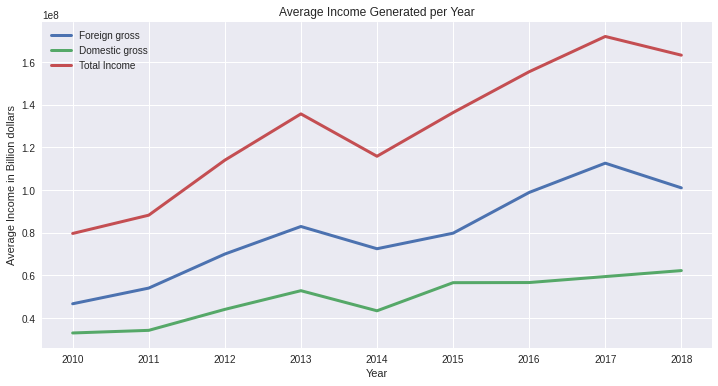

In [381]:
foreign = gross_income.groupby('year')['foreign_gross'].mean()
domestic= gross_income.groupby('year')['domestic_gross'].mean()
total=gross_income.groupby('year')['income_generated'].mean()
x=gross_income.year.unique()
plt.style.use('seaborn')
rcParams['figure.figsize']=12,6
plt.plot(x, foreign, linewidth=3)
plt.plot(x, domestic, linewidth=3)
plt.plot(x, total, linewidth=3)
plt.xlabel('Year')
plt.ylabel('Average Income in Billion dollars')
plt.title('Average Income Generated per Year')
plt.legend(['Foreign gross', 'Domestic gross', 'Total Income'])
plt.grid(True);


It is clear that movie profits have been on the rise exponentially from 2010 to 2013, in 2014 it took a deep before rising again up to 2017. Experienced a fall in total gross and foreign gross in 2018. however, domestic gross maintained a steady rise.
Throughout the eight years, Foreign income exceeded domestic income.

In [352]:
gross_income.year.max()

2018

In [353]:
gross_income.year.min()

2010

In [354]:
gross_income.studio.nunique()

172

In [355]:
income_per_studio = gross_income.groupby('studio', as_index=False)[['income_generated']].agg(lambda x: x.sum())
top_income_studios=income_per_studio.sort_values(by='income_generated', ascending=False).head(10)
top_income_studios

,studio,income_generated
22,BV,44190383898
57,Fox,30980366596
163,WB,30791502998
155,Uni.,29746809191
142,Sony,22404715096
126,Par.,19444197697
164,WB (NL),10314099999
89,LGF,8467470700
88,LG/S,5318923998
116,P/DW,5076500000


In [356]:
#for microsoft to generate income of more than 5 bilion dollars
#in a span of 8 years, it is crucial to invest in the top ten studios
#below is a bar chart representing total income of these studios 
#between 2010 and 2018.
import seaborn as sns


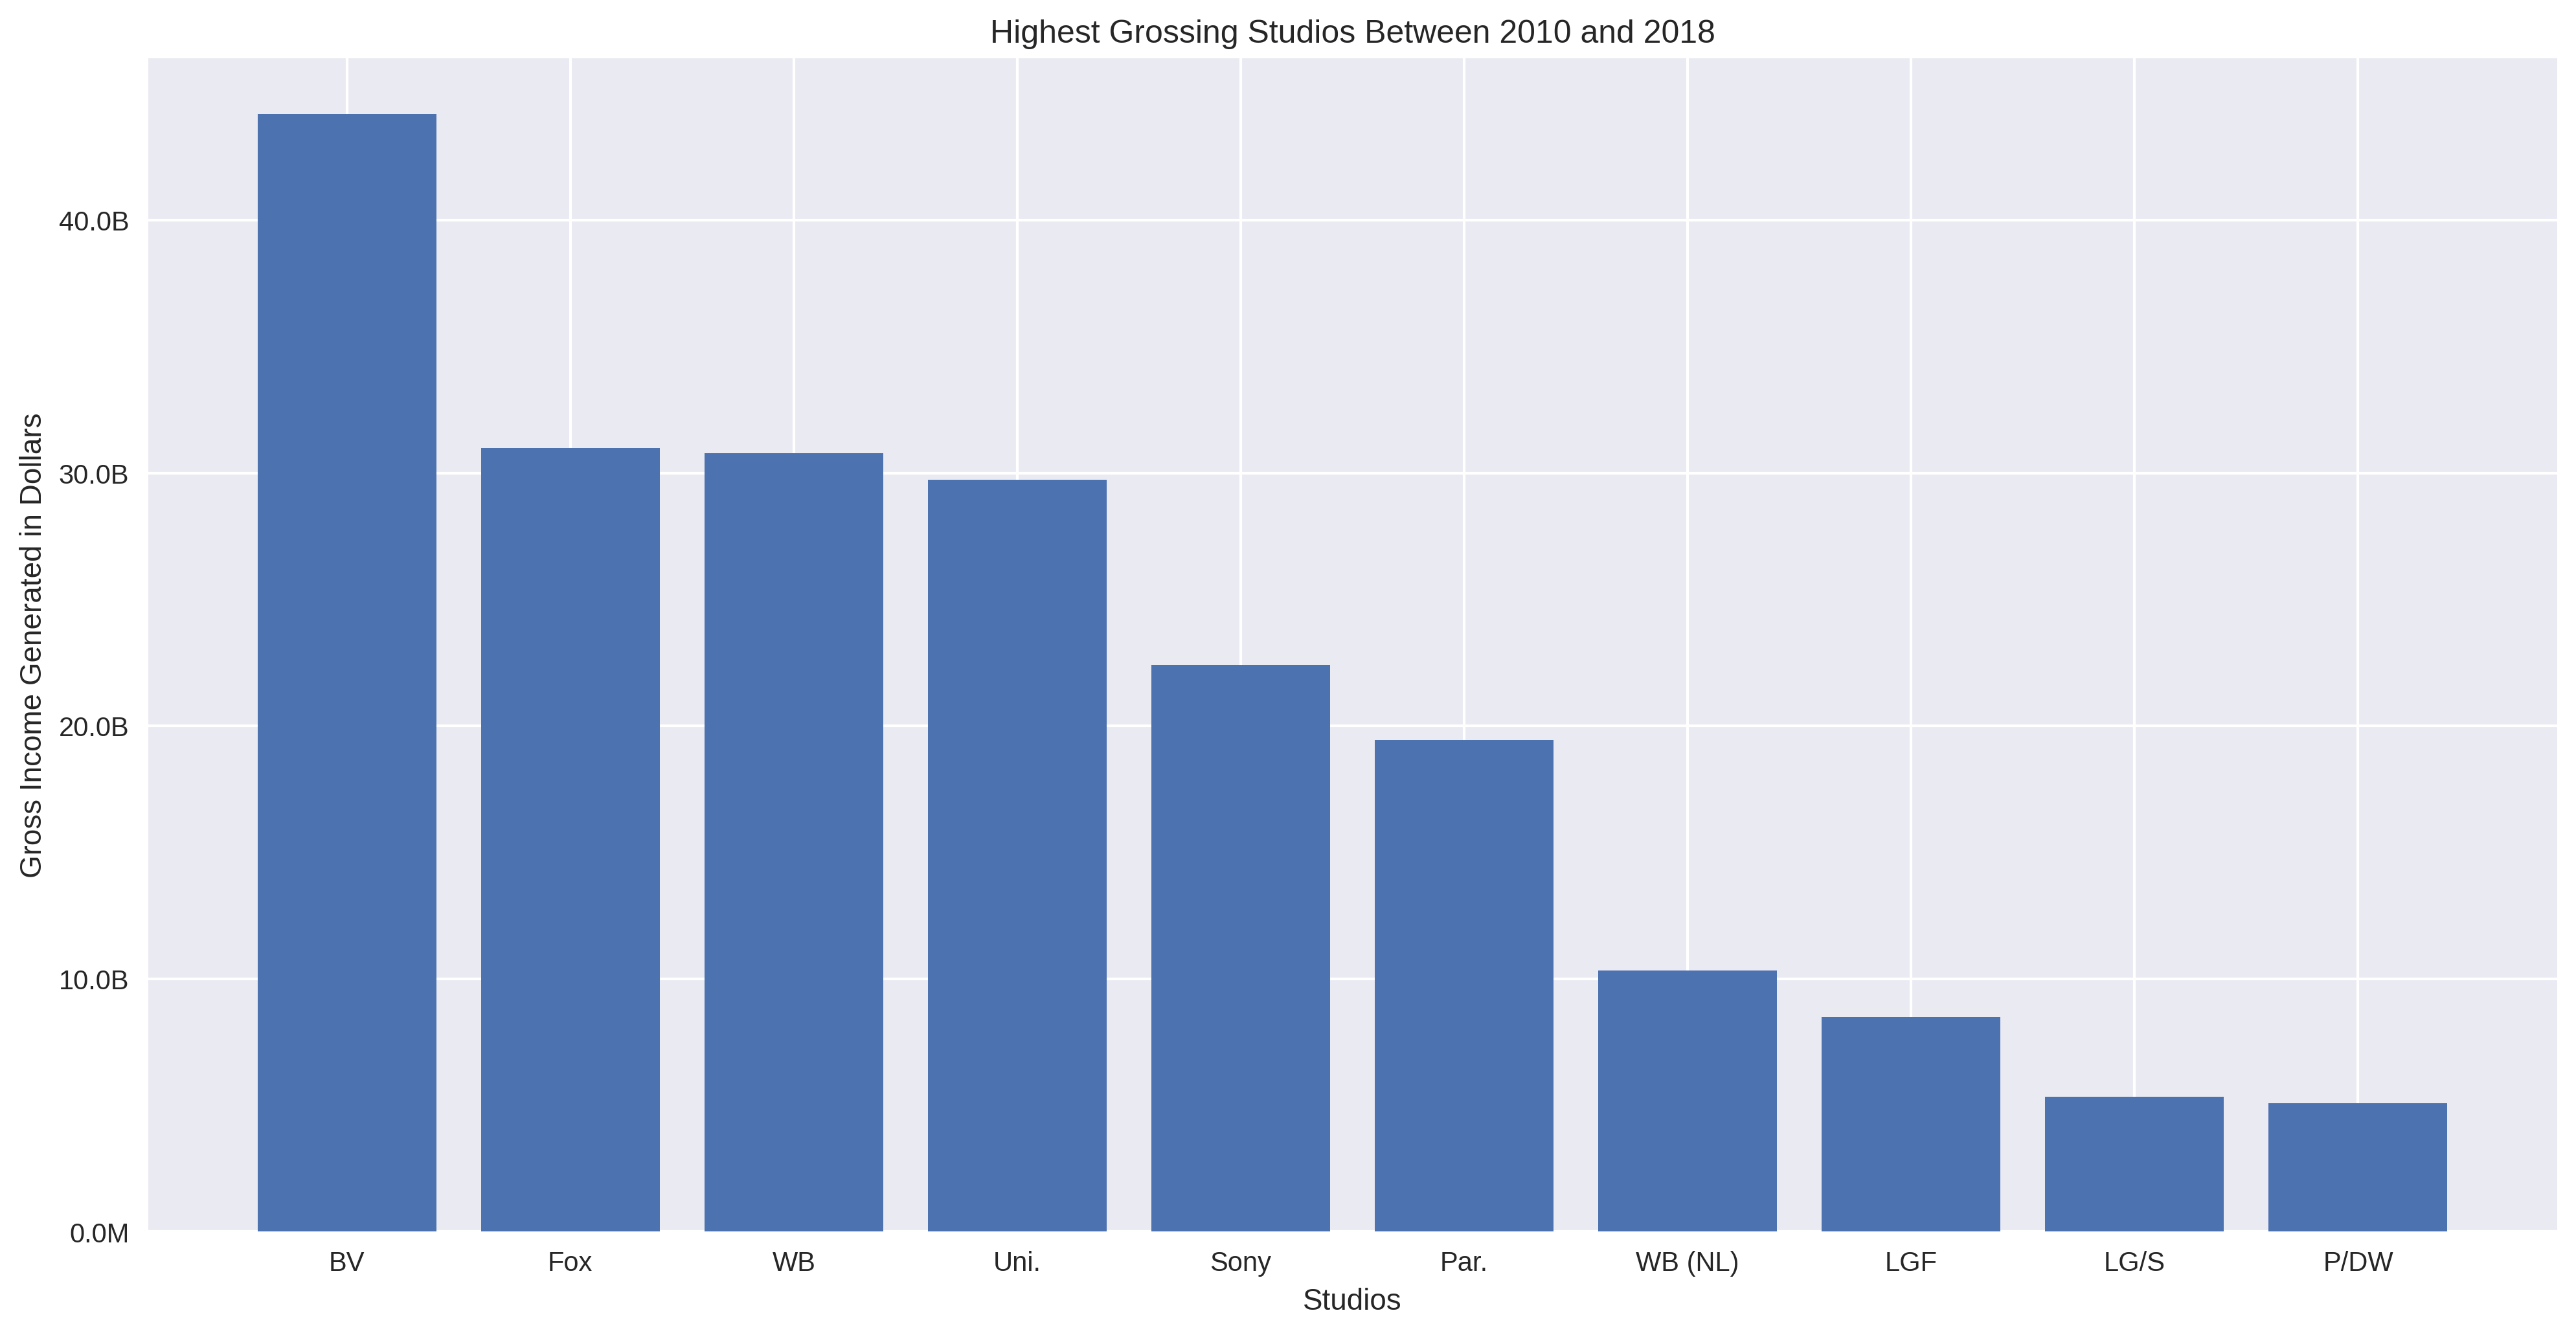

In [357]:

import matplotlib.ticker as tick
def format_large_ticks(tick_val, pos):
    if tick_val >= 1000000000:
      val = round(tick_val/1000000000, 1)
      new_tick_format = '{:}B'.format(val)
    else:
      tick_val >= 1000000
      val = round(tick_val/1000000, 1)
      new_tick_format = '{:}M'.format(val)

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    return new_tick_format
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
x=top_income_studios["studio"]
y=top_income_studios["income_generated"]
ax.bar(x,y)
ax.set_title('Highest Grossing Studios Between 2010 and 2018')
ax.set_xlabel('Studios')
ax.set_ylabel('Gross Income Generated in Dollars')
plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(format_large_ticks));

In [358]:
movies_per_studio=gross_income.groupby('studio', as_index=False)[['title']].agg(lambda x: x.count()).sort_values(by='title', ascending=False)
movies_per_studio

,studio,title
155,Uni.,144
57,Fox,134
163,WB,130
142,Sony,105
22,BV,104
...,...,...
97,MPFT,1
96,MOM,1
35,Da.,1
36,Darin Southa,1


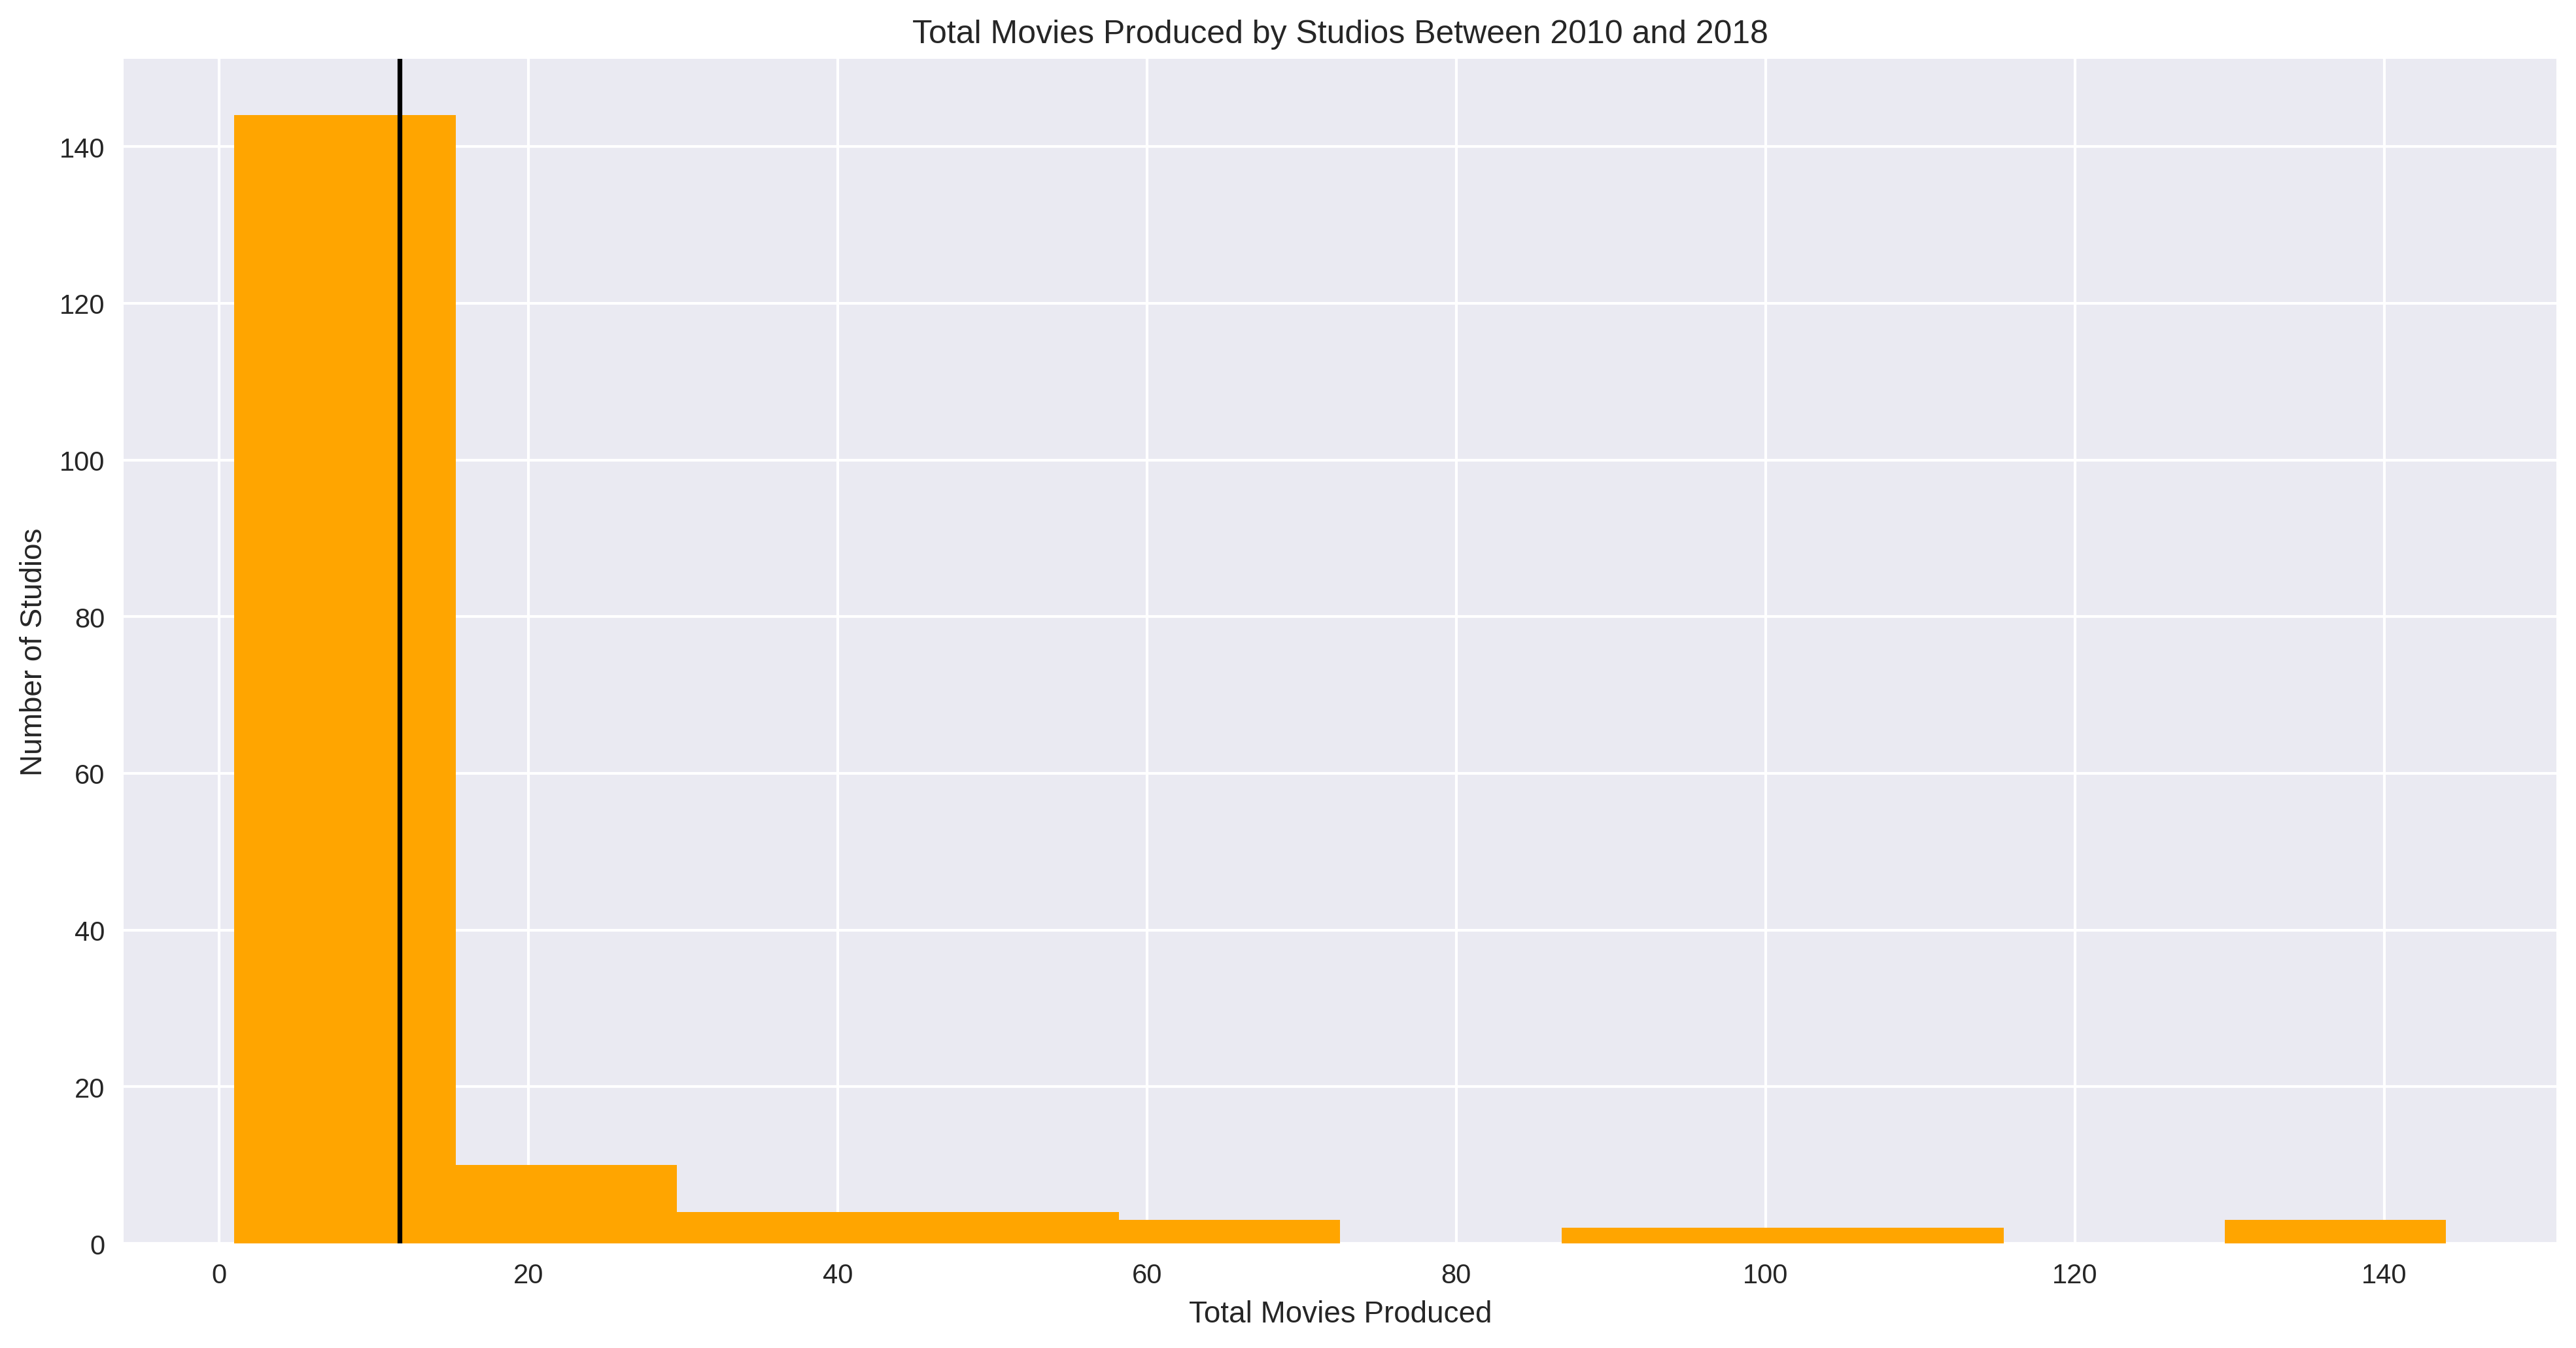

In [359]:
# plot a histogram showing movies each studio produced in a span of eight years
fig, ax = plt.subplots(figsize=(16,8), dpi=300)
mean=movies_per_studio.title.mean()
ax.axvline(mean, color="black")
ax.hist(movies_per_studio.title, color='orange')
ax.set_title('Total Movies Produced by Studios Between 2010 and 2018')
ax.set_xlabel('Total Movies Produced')
ax.set_ylabel('Number of Studios')
plt.show()

In [360]:
movies_per_studio.title.mean()

11.668604651162791

In [361]:
#most studios produced less than 20 movies in 8 years
#the mean is approximately 11 movies
#some produced more that 100 movies
#this is a right skewed histogram

In [362]:
#load data
#clean by dropping unnecessary columns, duplicates and null
movie_info= pd.read_csv('//content/drive/MyDrive/PROJECT1/DATA/rt.movie_info.tsv.gz', sep ='\t', encoding='latin')
movie_info.drop_duplicates(inplace=True)
movie_info.dropna(inplace=False)
to_merge= movie_info.drop(columns=['synopsis', 'theater_date', 'rating', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio'])
to_merge

,id,genre,director,writer
0,1,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman
1,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo
2,5,Drama|Musical and Performing Arts,Allison Anders,Allison Anders
3,6,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton
4,7,Drama|Romance,Rodney Bennett,Giles Cooper
...,...,...,...,...
1555,1996,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN
1556,1997,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner
1557,1998,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN
1558,1999,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter


In [363]:

# merge to_merge dataframe with movies_profit, drop null values
merged_df=pd.merge(movies_profit,to_merge)
merged_df.dropna(inplace=True)

In [364]:
# identify directors, writers and  genres of movies with the highest grossing
top_10_directors=merged_df.sort_values(['movie_profit'], ascending=False).head(10)
top_10_directors

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,movie_profit,month,genre,director,writer
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5552690558,5127690558,12,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman
54,43,1997-12-19,Titanic,200000000,659363944,2208208395,4416416790,4216416790,12,Classics|Comedy|Musical and Performing Arts,William Wellman,Nunnally Johnson
107,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,4106622440,3800622440,12,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton
160,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,4096268400,3796268400,4,Drama|Romance,Rodney Bennett,Giles Cooper
211,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,3297709728,3082709728,6,Action and Adventure|Mystery and Suspense,John Woo,William Goldman|John Logan|David Marconi|Micha...
264,67,2015-04-03,Furious 7,190000000,353007020,1518722794,3037445588,2847445588,4,Horror,Matt Bettinelli-Olpin|Tyler Gillett,Lindsay Devlin
370,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2683386314,2558386314,7,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan
476,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2611545598,2441545598,6,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian
526,56,2013-11-22,Frozen,150000000,400738009,1272469910,2544939820,2394939820,11,Drama,Allen Hughes|Albert Hughes,Michael Henry Brown|Albert Hughes|Allen Hughes
573,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,2518399412,2358399412,3,Drama,Michael Polish,Michael Polish|Mark Polish


In [367]:
x=merged_df.groupby('director', as_index=False)[['movie_profit']].mean().sort_values(by='movie_profit', ascending=False)
x.head()

,director,movie_profit
23,Jim Jarmusch,2.687584e+08
52,William Wellman,2.600558e+08
2,Allen Hughes|Albert Hughes,2.448738e+08
9,Carl Erik Rinsch,2.317935e+08
4,Anatole Litvak,2.187969e+08


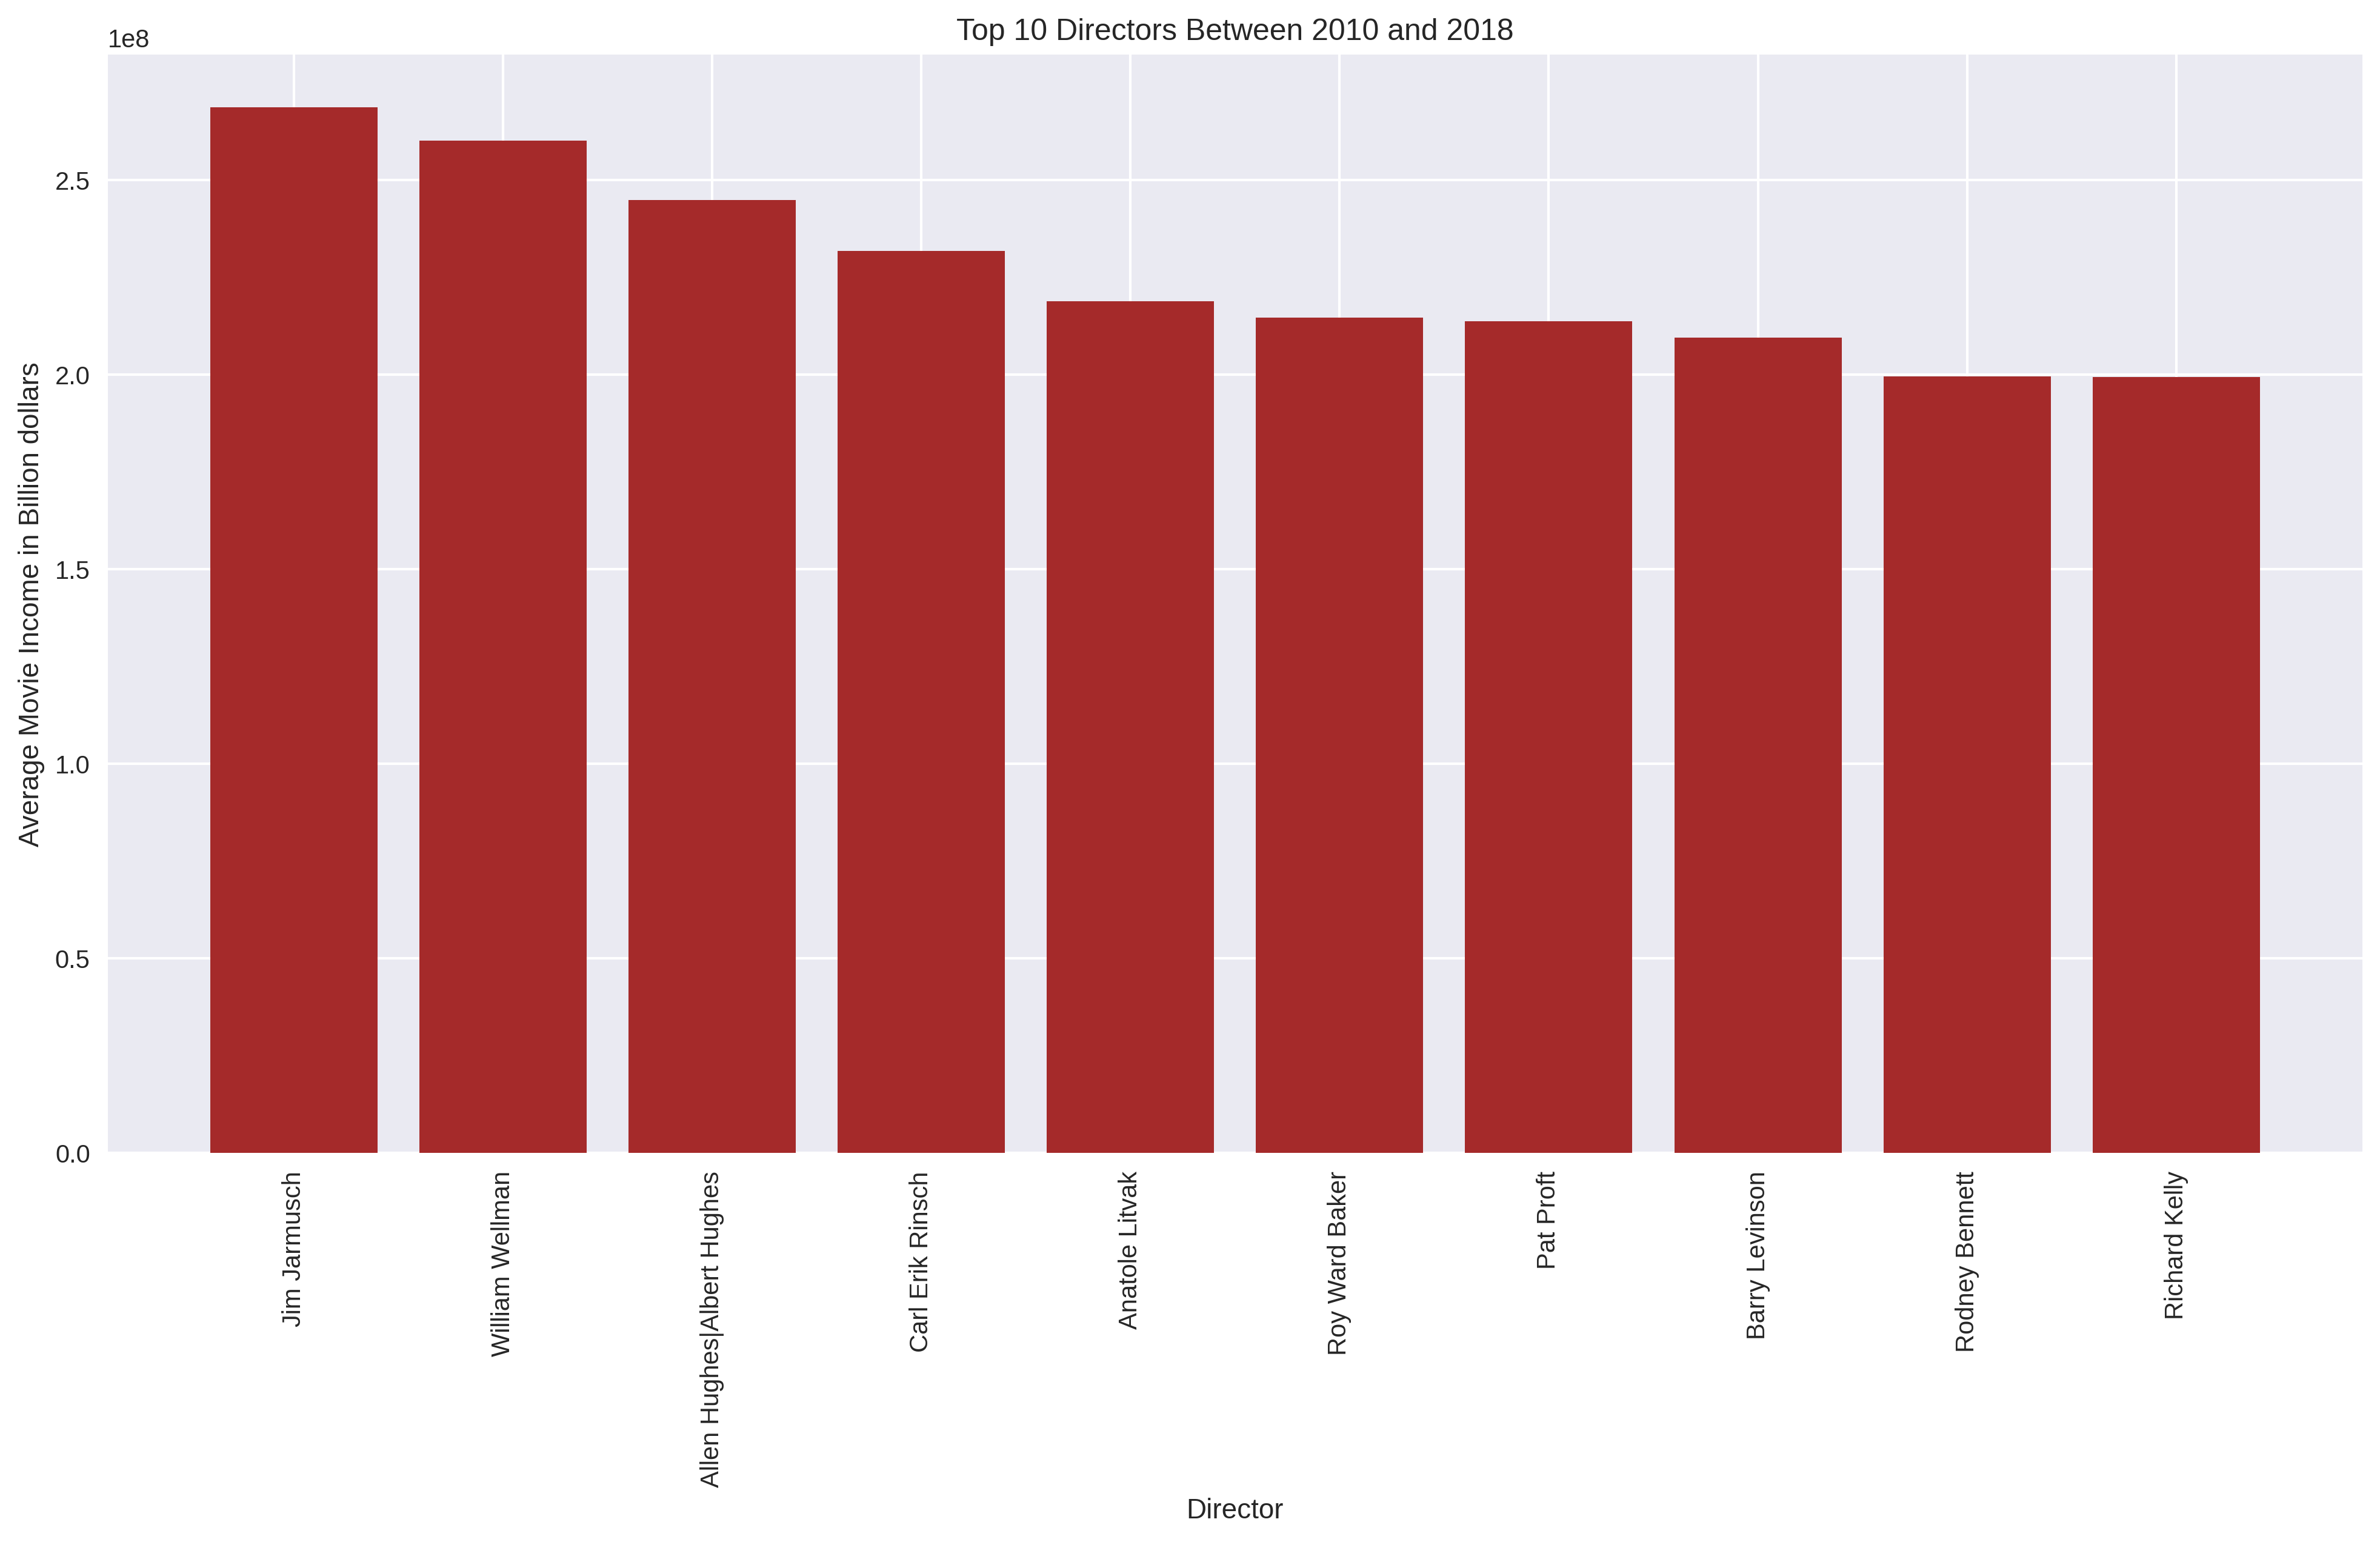

In [380]:
fig, ax=plt.subplots(figsize=(16,8), dpi=300)
ax.bar(x.director[:10], x.movie_profit[:10], color='brown')
ax.set_title('Top 10 Directors Between 2010 and 2018')
ax.set_xlabel('Director')
ax.set_ylabel('Average Movie Income in Billion dollars')
plt.xticks( rotation=90);


In [442]:
# Hiring Jim Jarmusch, William Wellman, Allen, AlberT, Albert, Anatole, Roy Ward, Pat Profit, Barry Levinson, Rodney, Richard Kelly; 
# may increase the probability of a movie accruing higher returns